In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Epoch-based models
byol = pd.read_csv('/kaggle/input/model-data-result/byol_ssl_rf_results_all_epochs.csv')
dino = pd.read_csv('/kaggle/input/model-data-result/dino_ssl_rf_results_all_epochs.csv')
simclr = pd.read_csv('/kaggle/input/model-data-result/simclr_ssl_rf_results_all_epochs.csv')
moco_RF = pd.read_csv('/kaggle/input/model-data-result/moco_results_all_epochs.csv')
moco_LR = pd.read_csv('/kaggle/input/model-com-moco/moco_logreg_results.csv')
moco_SVM = pd.read_csv('/kaggle/input/model-com-moco/moco_svm_results.csv')
moco_XgBoost = pd.read_csv('/kaggle/input/model-com-moco/moco_xgboost_results.csv')

# SSL and RF (final results only)
ssl = pd.read_csv('/kaggle/input/model-data-result/ssl_rf_results_all_epochs.csv')
rf = pd.read_csv('/kaggle/input/model-data-result/RF_model_results.csv')

In [54]:
def extract_best(df, model_name):
    best = df.groupby(['train_pct', 'test_pct']).apply(
        lambda g: g.loc[g['accuracy'].idxmax()]
    ).reset_index(drop=True)
    best['model'] = model_name
    return best[['train_pct', 'test_pct', 'accuracy', 'f1_class_0', 'f1_class_1', 'model']]

byol_best = extract_best(byol, 'BYOL')
dino_best = extract_best(dino, 'DINO')
moco_best = extract_best(moco_RF, 'MoCo')
simclr_best = extract_best(simclr, 'SimCLR')


/tmp/ipykernel_35/3612837029.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct']).apply(
/tmp/ipykernel_35/3612837029.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct']).apply(
/tmp/ipykernel_35/3612837029.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and

In [55]:
# SSL
ssl['model'] = 'SSL'
ssl = ssl[['train_pct', 'test_pct', 'accuracy', 'f1_class_0', 'f1_class_1', 'model']]

# RF
rf[['train_pct', 'test_pct']] = rf['Unnamed: 0'].str.split(':', expand=True).astype(int)
rf.rename(columns={'f1_0': 'f1_class_0', 'f1_1': 'f1_class_1'}, inplace=True)
rf['model'] = 'RandomForest'
rf = rf[['train_pct', 'test_pct', 'accuracy', 'f1_class_0', 'f1_class_1', 'model']]

In [56]:
all_models = pd.concat([
    byol_best, dino_best, moco_best, simclr_best, ssl, rf
], ignore_index=True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

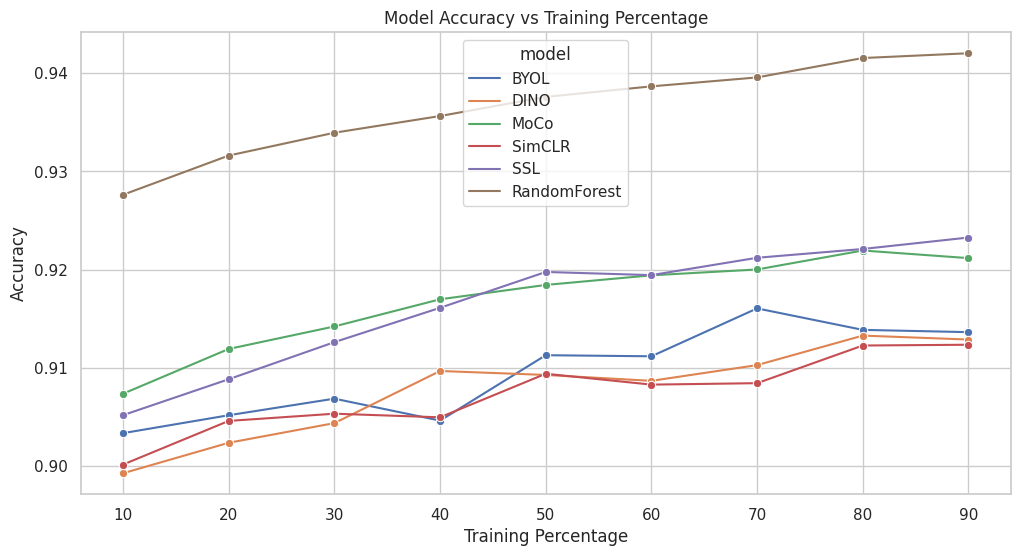

In [58]:
plt.figure(figsize=(12,6))
sns.lineplot(data=all_models, x='train_pct', y='accuracy', hue='model', marker='o')
plt.title("Model Accuracy vs Training Percentage")
plt.xlabel("Training Percentage")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

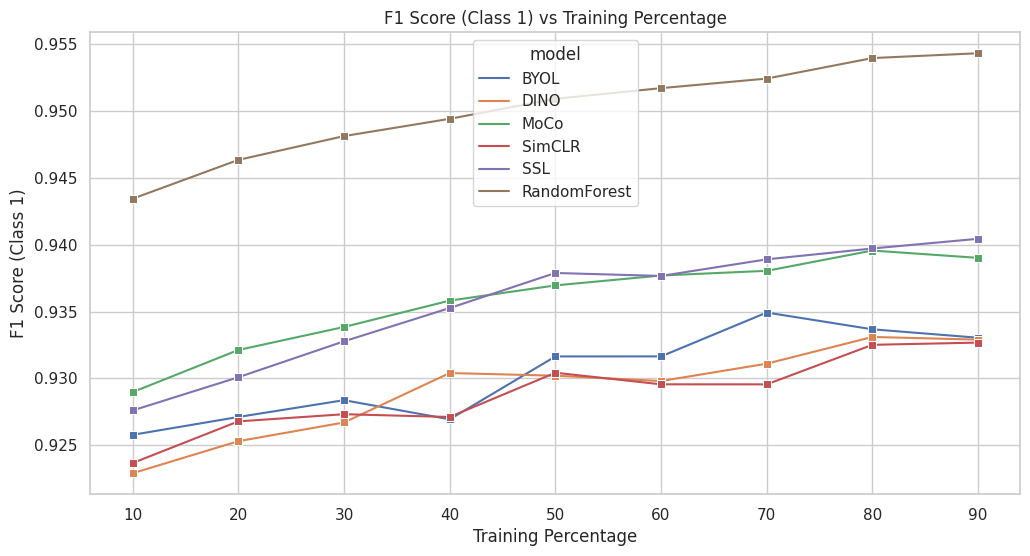

In [59]:
plt.figure(figsize=(12,6))
sns.lineplot(data=all_models, x='train_pct', y='f1_class_1', hue='model', marker='s')
plt.title("F1 Score (Class 1) vs Training Percentage")
plt.xlabel("Training Percentage")
plt.ylabel("F1 Score (Class 1)")
plt.grid(True)
plt.show()

In [8]:
# Best model at 90:10
all_models[all_models['train_pct'] == 90].sort_values(by='accuracy', ascending=False)

,train_pct,test_pct,accuracy,f1_class_0,f1_class_1,model
53,90.0,10.0,0.942021,0.920625,0.954331,RandomForest
44,90.0,10.0,0.923277,0.892197,0.940446,SSL
26,90.0,10.0,0.921181,0.888596,0.939018,MoCo
8,90.0,10.0,0.913653,0.878462,0.933040,BYOL
17,90.0,10.0,0.912900,0.876100,0.932900,DINO
35,90.0,10.0,0.912372,0.874528,0.932677,SimCLR


In [9]:
all_models.groupby('model')[['accuracy', 'f1_class_0', 'f1_class_1']].mean().sort_values(by='accuracy', ascending=False)

,accuracy,f1_class_0,f1_class_1
model,,,
RandomForest,0.936463,0.912624,0.950081
MoCo,0.916846,0.882062,0.935783
SSL,0.916519,0.881371,0.935594
BYOL,0.909581,0.871165,0.930346
DINO,0.907811,0.868089,0.929156
SimCLR,0.907335,0.867187,0.928844


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

Text(0.5, 1.0, 'Model Accuracy vs Training Percentage')

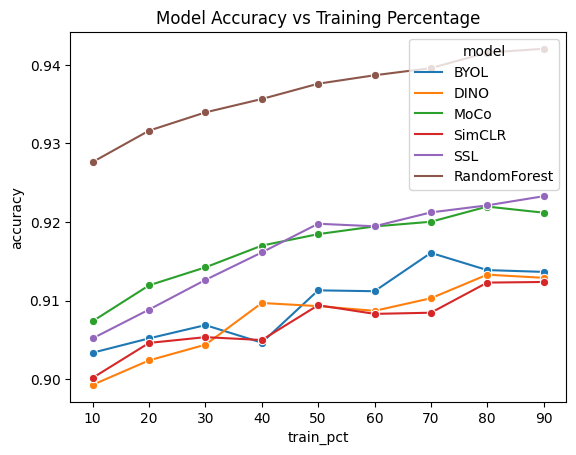

In [10]:
sns.lineplot(data=all_models, x='train_pct', y='accuracy', hue='model', marker='o')
plt.title("Model Accuracy vs Training Percentage")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

Text(0.5, 1.0, 'F1 Score (Class 0) vs Training Percentage')

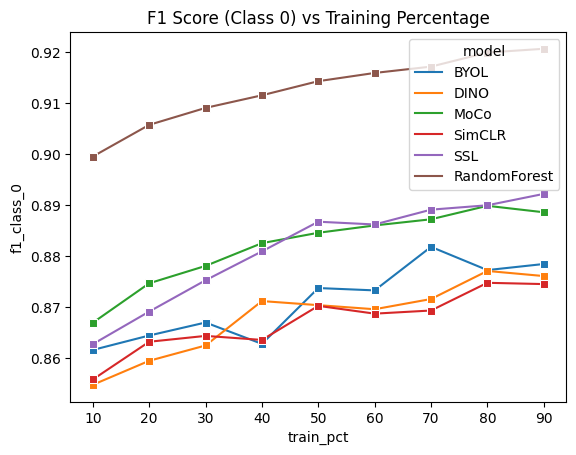

In [11]:
sns.lineplot(data=all_models, x='train_pct', y='f1_class_0', hue='model', marker='s')
plt.title("F1 Score (Class 0) vs Training Percentage")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

Text(0.5, 1.0, 'F1 Score (Class 1) vs Training Percentage')

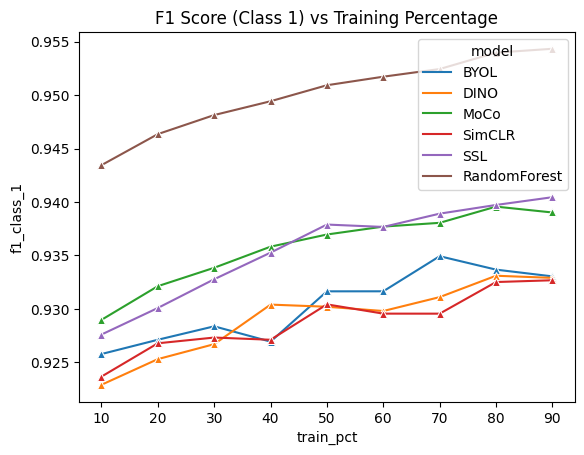

In [12]:
sns.lineplot(data=all_models, x='train_pct', y='f1_class_1', hue='model', marker='^')
plt.title("F1 Score (Class 1) vs Training Percentage")

In [13]:
summary_table = all_models.groupby('model')[
    ['accuracy', 'f1_class_0', 'f1_class_1']
].mean().sort_values(by='accuracy', ascending=False).round(4)

summary_table

,accuracy,f1_class_0,f1_class_1
model,,,
RandomForest,0.9365,0.9126,0.9501
MoCo,0.9168,0.8821,0.9358
SSL,0.9165,0.8814,0.9356
BYOL,0.9096,0.8712,0.9303
DINO,0.9078,0.8681,0.9292
SimCLR,0.9073,0.8672,0.9288


In [14]:
avg_metrics = all_models.groupby('model')[
    ['accuracy', 'f1_class_0', 'f1_class_1']
].mean().reset_index().round(4)

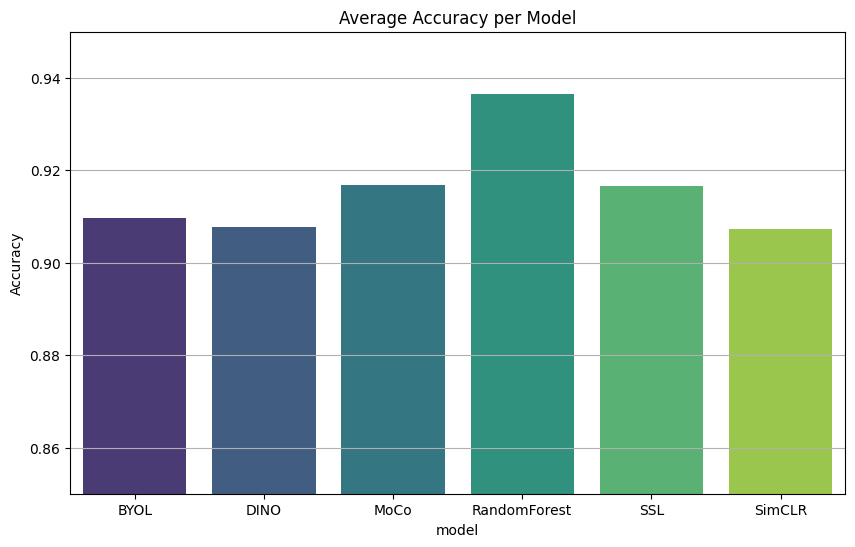

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(data=avg_metrics, x='model', y='accuracy', palette='viridis')
plt.title("Average Accuracy per Model")
plt.ylabel("Accuracy")
plt.ylim(0.85, 0.95)  # adjust based on your range
plt.grid(axis='y')
plt.show()

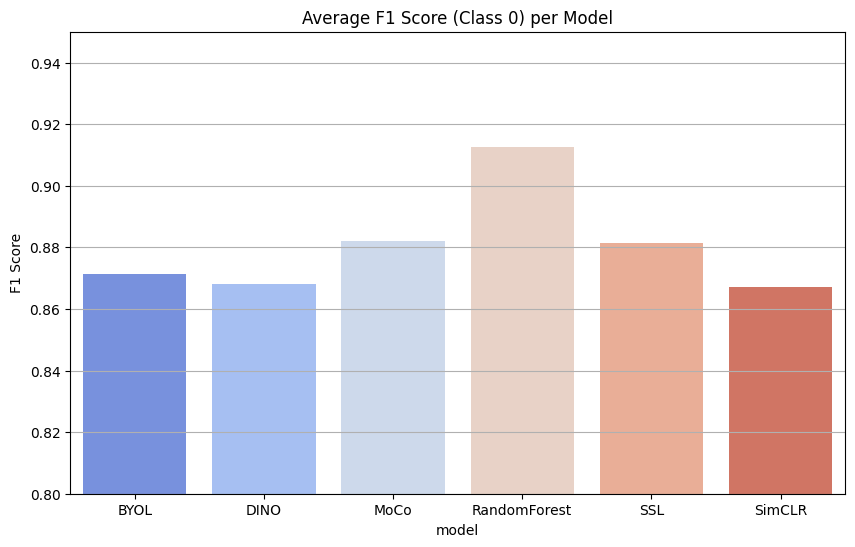

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(data=avg_metrics, x='model', y='f1_class_0', palette='coolwarm')
plt.title("Average F1 Score (Class 0) per Model")
plt.ylabel("F1 Score")
plt.ylim(0.80, 0.95)
plt.grid(axis='y')
plt.show()

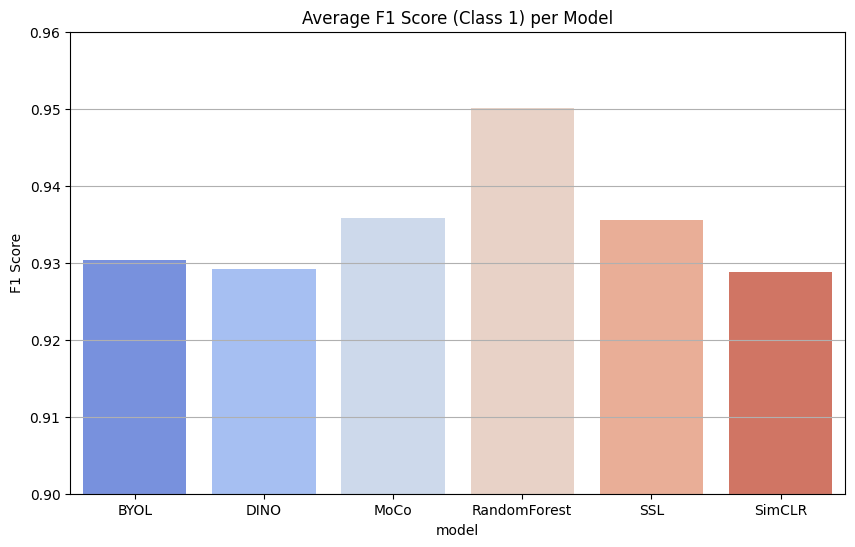

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(data=avg_metrics, x='model', y='f1_class_1', palette='coolwarm')
plt.title("Average F1 Score (Class 1) per Model")
plt.ylabel("F1 Score")
plt.ylim(0.90, 0.96)
plt.grid(axis='y')
plt.show()

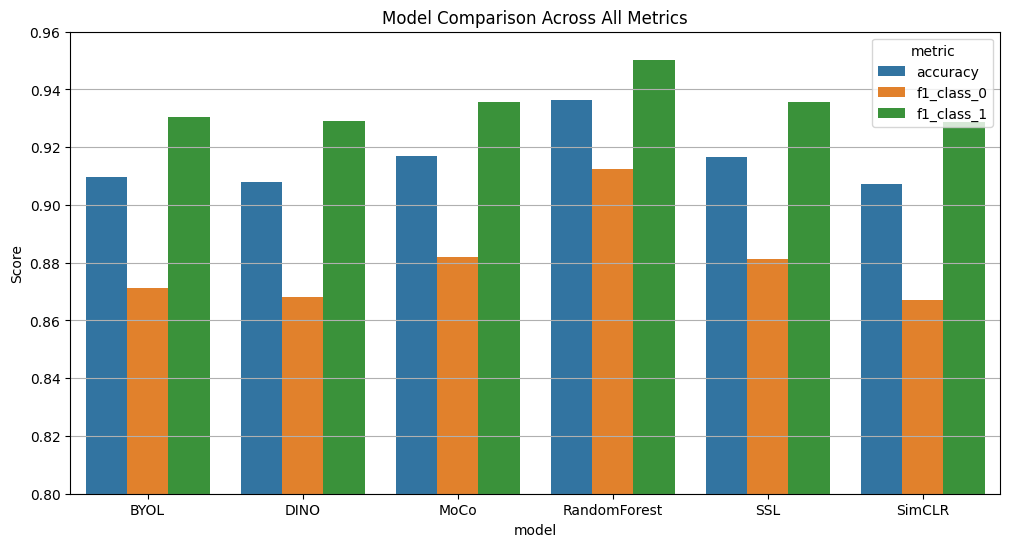

In [18]:
# Melt for grouped bar chart
melted = avg_metrics.melt(id_vars='model', var_name='metric', value_name='score')

plt.figure(figsize=(12,6))
sns.barplot(data=melted, x='model', y='score', hue='metric')
plt.title("Model Comparison Across All Metrics")
plt.ylabel("Score")
plt.ylim(0.80, 0.96)
plt.grid(axis='y')
plt.show()

Compare MoCo, DINO, BYOL, SimCLR (Final Epoch Only)

In [19]:
# Load files (adjust paths as per your Kaggle inputs)
# Epoch-based models
byol = pd.read_csv('/kaggle/input/model-data-result/byol_ssl_rf_results_all_epochs.csv')
dino = pd.read_csv('/kaggle/input/model-data-result/dino_ssl_rf_results_all_epochs.csv')
moco = pd.read_csv('/kaggle/input/model-data-result/moco_results_all_epochs.csv')
simclr = pd.read_csv('/kaggle/input/model-data-result/simclr_ssl_rf_results_all_epochs.csv')

# SSL and RF (final results only)
ssl = pd.read_csv('/kaggle/input/model-data-result/ssl_rf_results_all_epochs.csv')
rf = pd.read_csv('/kaggle/input/model-data-result/RF_model_results.csv')

In [35]:
def get_best_epoch(df, model_name):
    best = df.groupby(['train_pct', 'test_pct']).apply(lambda g: g.loc[g['accuracy'].idxmax()])
    best['model'] = model_name
    return best.reset_index(drop=True)[['train_pct', 'test_pct', 'accuracy', 'f1_class_0', 'f1_class_1', 'model']]

byol_best = get_best_epoch(byol, 'BYOL')
dino_best = get_best_epoch(dino, 'DINO')
moco_best = get_best_epoch(moco, 'MoCo')
simclr_best = get_best_epoch(simclr, 'SimCLR')

# Combine
focused_df = pd.concat([byol_best, dino_best, moco_best, simclr_best], ignore_index=True)

/tmp/ipykernel_35/482324908.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct']).apply(lambda g: g.loc[g['accuracy'].idxmax()])
/tmp/ipykernel_35/482324908.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct']).apply(lambda g: g.loc[g['accuracy'].idxmax()])
/tmp/ipykernel_35/482324908.py:2: DeprecationWarning: DataFrameGro

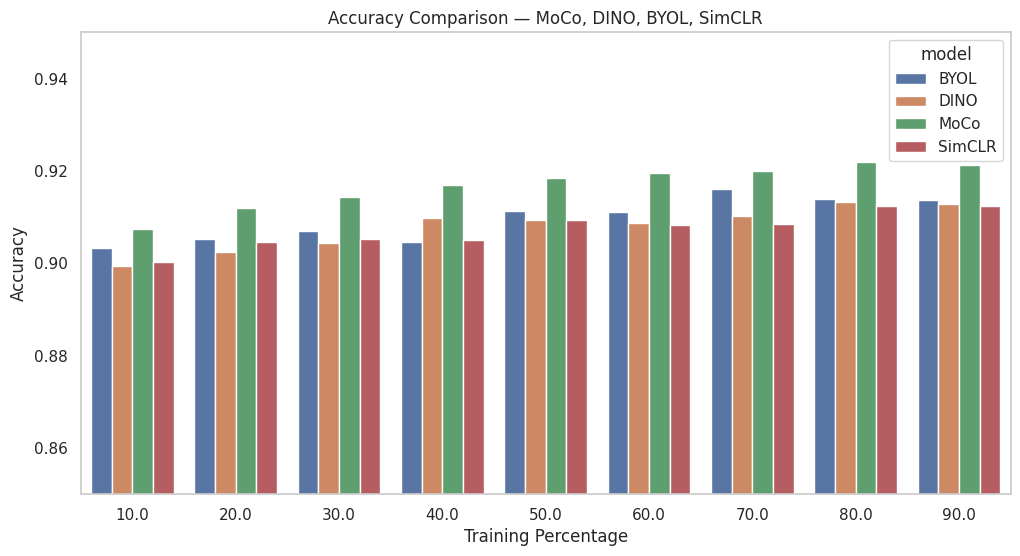

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(data=focused_df, x='train_pct', y='accuracy', hue='model')
plt.title("Accuracy Comparison — MoCo, DINO, BYOL, SimCLR")
plt.xlabel("Training Percentage")
plt.ylabel("Accuracy")
plt.ylim(0.85, 0.95)
plt.grid(axis='y')
plt.show()

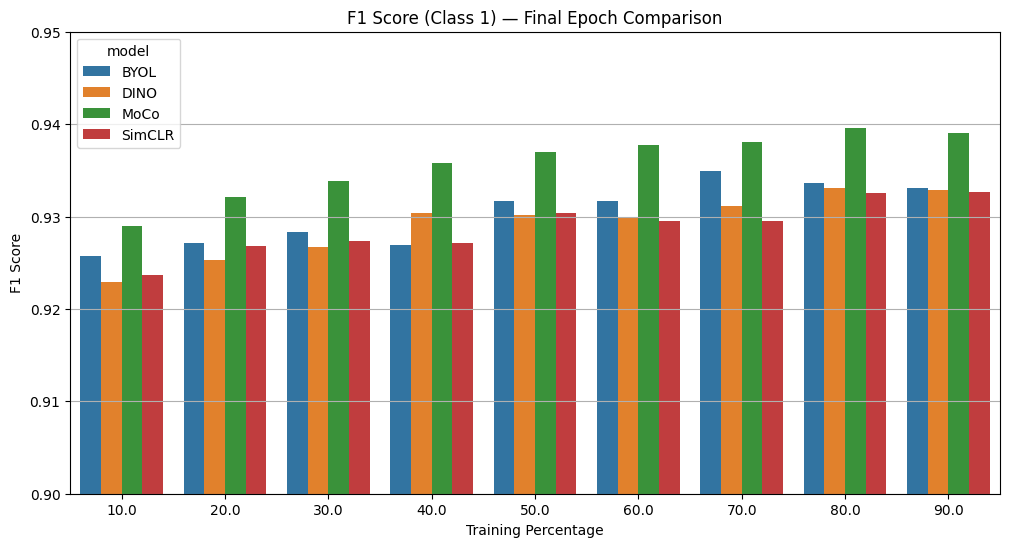

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(data=focused_df, x='train_pct', y='f1_class_1', hue='model')
plt.title("F1 Score (Class 1) — Final Epoch Comparison")
plt.xlabel("Training Percentage")
plt.ylabel("F1 Score")
plt.ylim(0.90, 0.95)
plt.grid(axis='y')
plt.show()

In [23]:
focused_df.sort_values(['train_pct', 'model'])

,train_pct,test_pct,accuracy,f1_class_0,f1_class_1,model
0,10.0,90.0,0.903379,0.861625,0.925776,BYOL
9,10.0,90.0,0.899300,0.854800,0.922900,DINO
18,10.0,90.0,0.907389,0.866960,0.928973,MoCo
27,10.0,90.0,0.900184,0.855839,0.923665,SimCLR
1,20.0,80.0,0.905200,0.864454,0.927111,BYOL
10,20.0,80.0,0.902400,0.859500,0.925300,DINO
19,20.0,80.0,0.911943,0.874684,0.932124,MoCo
28,20.0,80.0,0.904623,0.863231,0.926781,SimCLR
2,30.0,70.0,0.906887,0.867001,0.928369,BYOL
11,30.0,70.0,0.904400,0.862500,0.926700,DINO


Epoch-wise Comparison (MoCo, DINO, BYOL, SimCLR)

In [9]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Step 2: Load the CSVs
# Epoch-based models
byol = pd.read_csv('/kaggle/input/model-data-result/byol_ssl_rf_results_all_epochs.csv')
dino = pd.read_csv('/kaggle/input/model-data-result/dino_ssl_rf_results_all_epochs.csv')
moco = pd.read_csv('/kaggle/input/model-data-result/moco_results_all_epochs.csv')
simclr = pd.read_csv('/kaggle/input/model-data-result/simclr_ssl_rf_results_all_epochs.csv')

# SSL and RF (final results only)
ssl = pd.read_csv('/kaggle/input/model-data-result/ssl_rf_results_all_epochs.csv')
rf = pd.read_csv('/kaggle/input/model-data-result/RF_model_results.csv')

# Step 3: Add model name to each
byol['model'] = 'BYOL'
dino['model'] = 'DINO'
moco['model'] = 'MoCo'
simclr['model'] = 'SimCLR'

# Step 4: Combine into one DataFrame
all_df = pd.concat([byol, dino, moco, simclr], ignore_index=True)
all_df = all_df[['train_pct', 'test_pct', 'epoch', 'accuracy', 'f1_class_0', 'f1_class_1', 'model']]


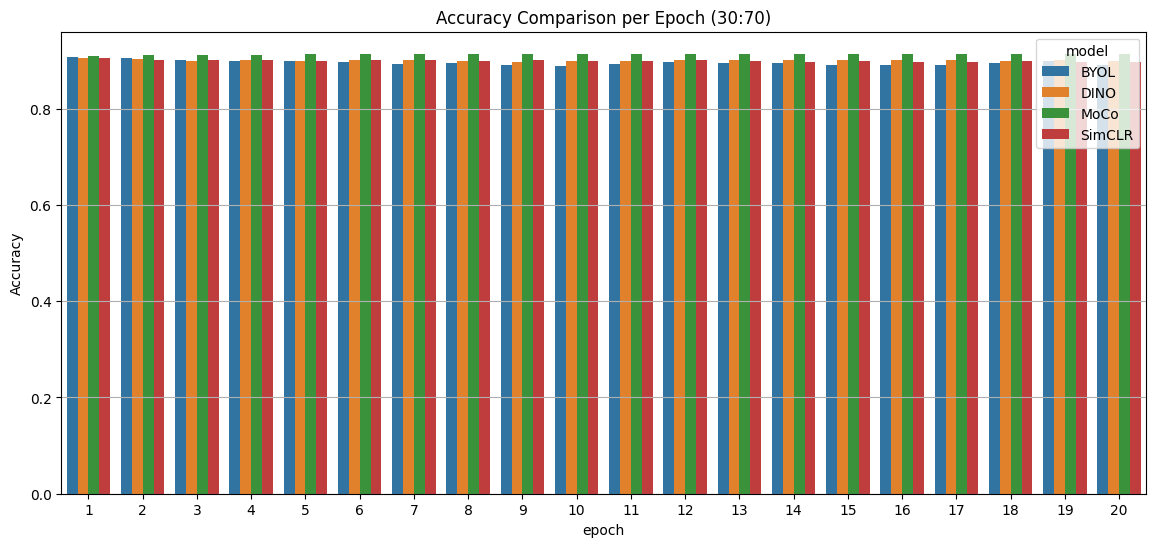

In [10]:
# Choose a train/test split to visualize
train_pct = 30
test_pct = 70

subset = all_df[(all_df['train_pct'] == train_pct) & (all_df['test_pct'] == test_pct)]

plt.figure(figsize=(14,6))
sns.barplot(data=subset, x='epoch', y='accuracy', hue='model')
plt.title(f'Accuracy Comparison per Epoch ({train_pct}:{test_pct})')
plt.ylabel("Accuracy")
plt.grid(axis='y')
plt.show()

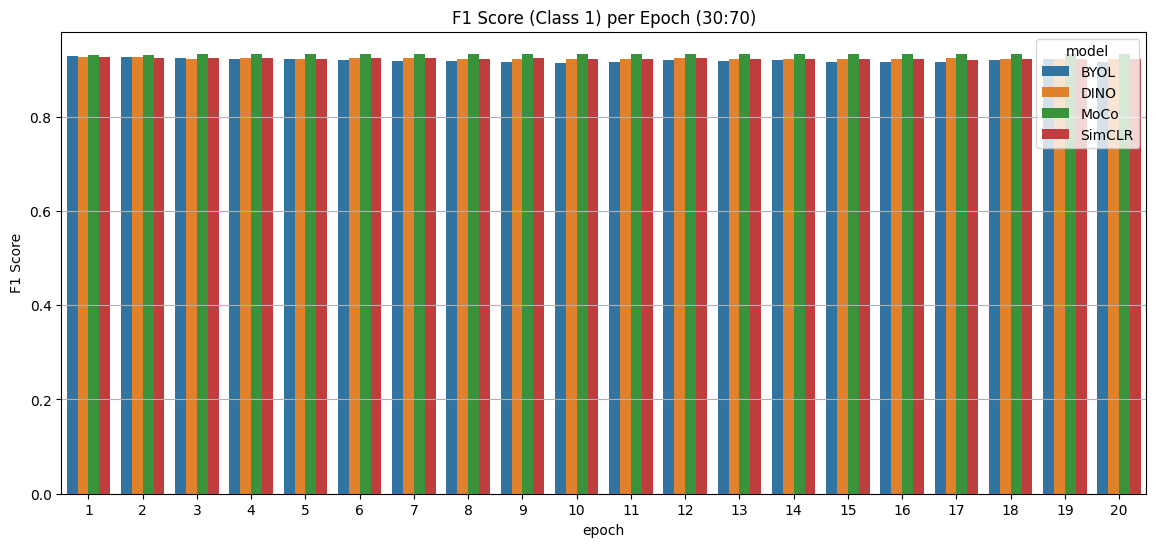

In [11]:
plt.figure(figsize=(14,6))
sns.barplot(data=subset, x='epoch', y='f1_class_1', hue='model')
plt.title(f'F1 Score (Class 1) per Epoch ({train_pct}:{test_pct})')
plt.ylabel("F1 Score")
plt.grid(axis='y')
plt.show()

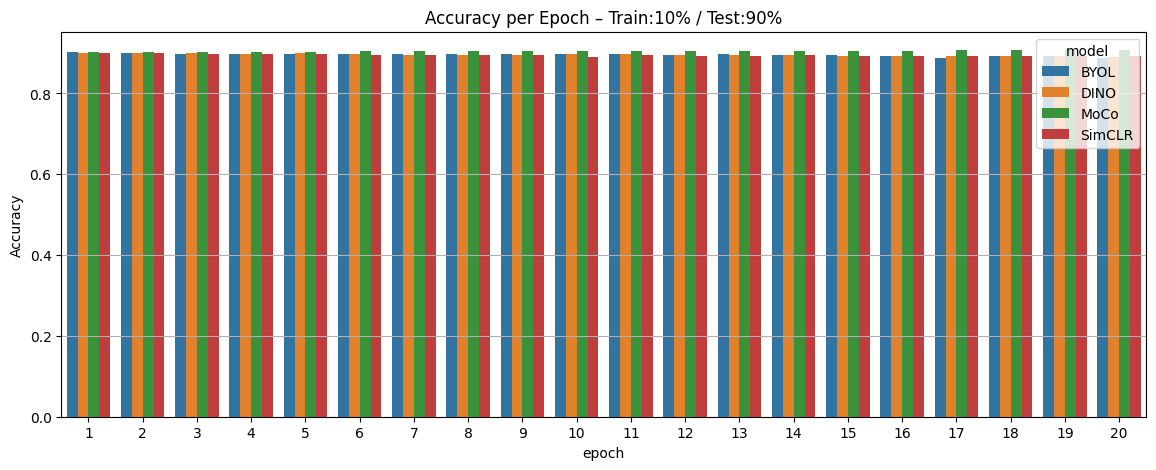

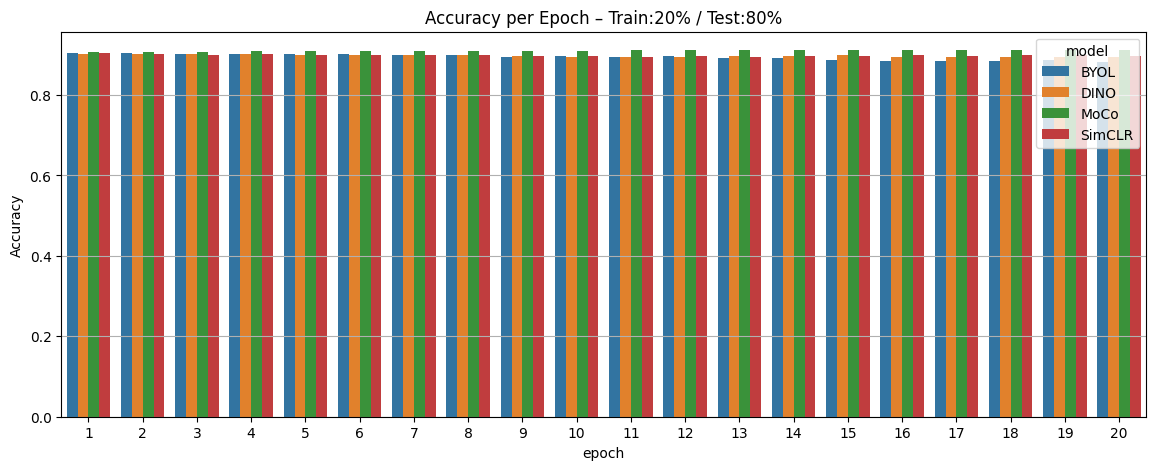

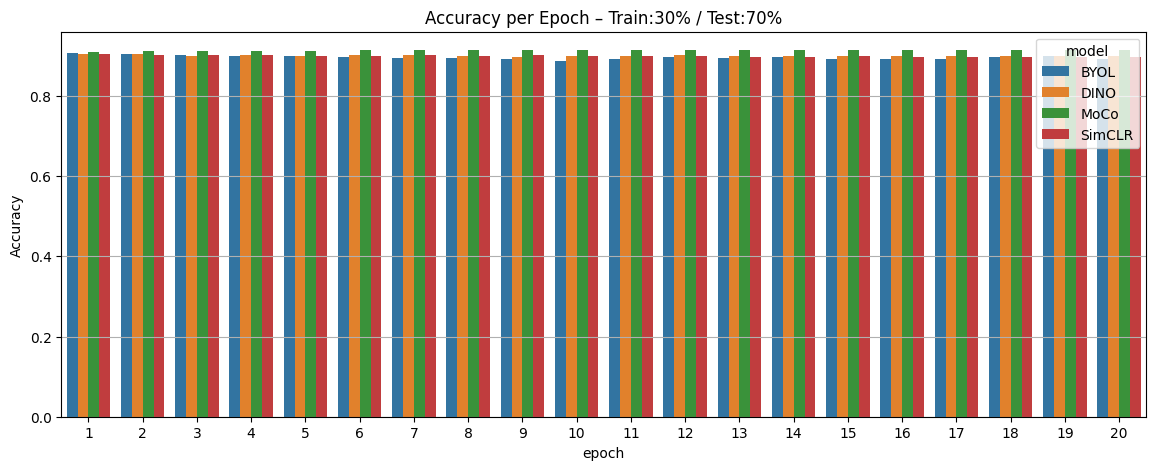

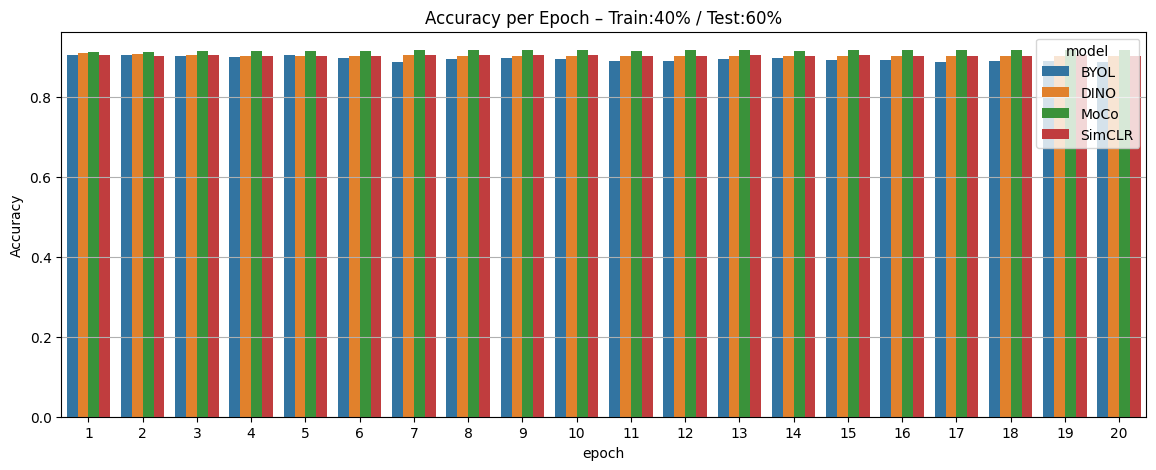

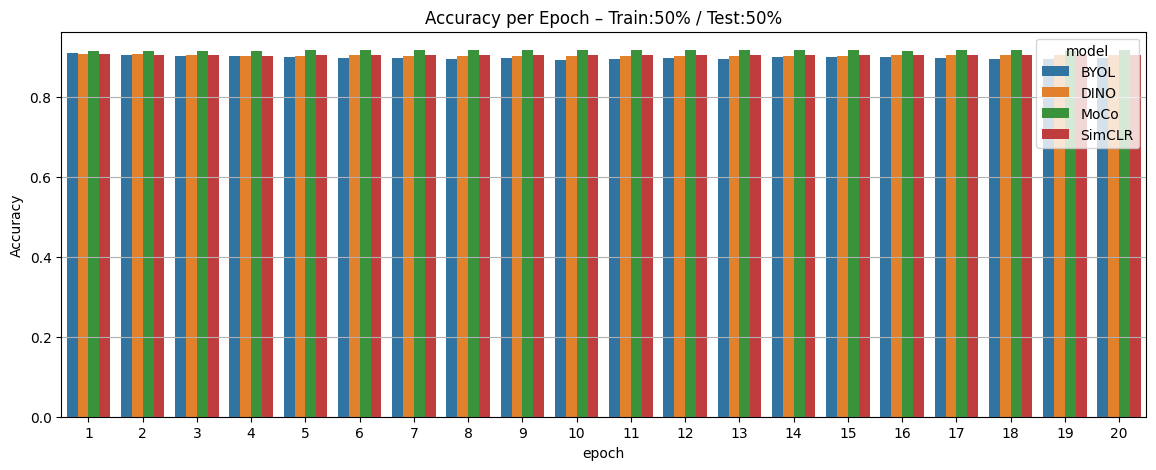

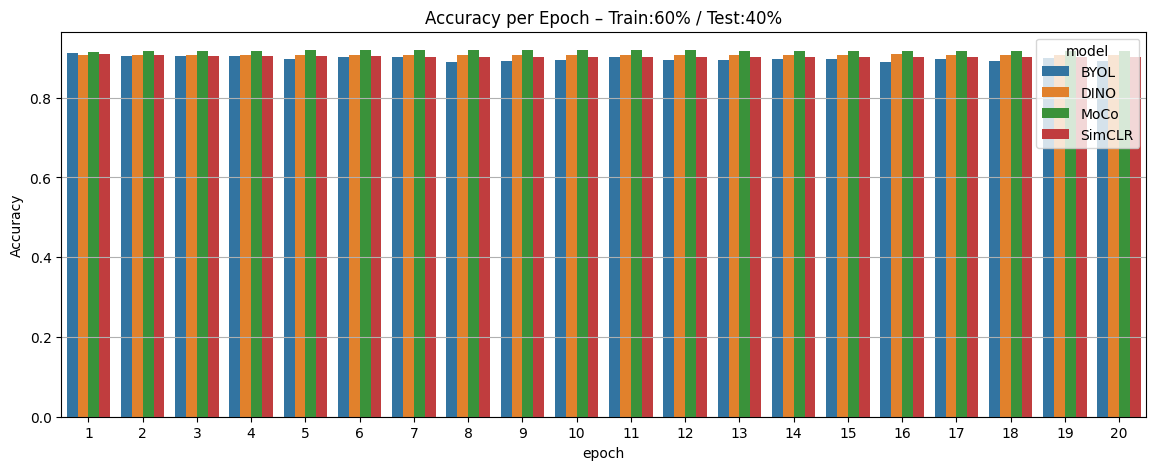

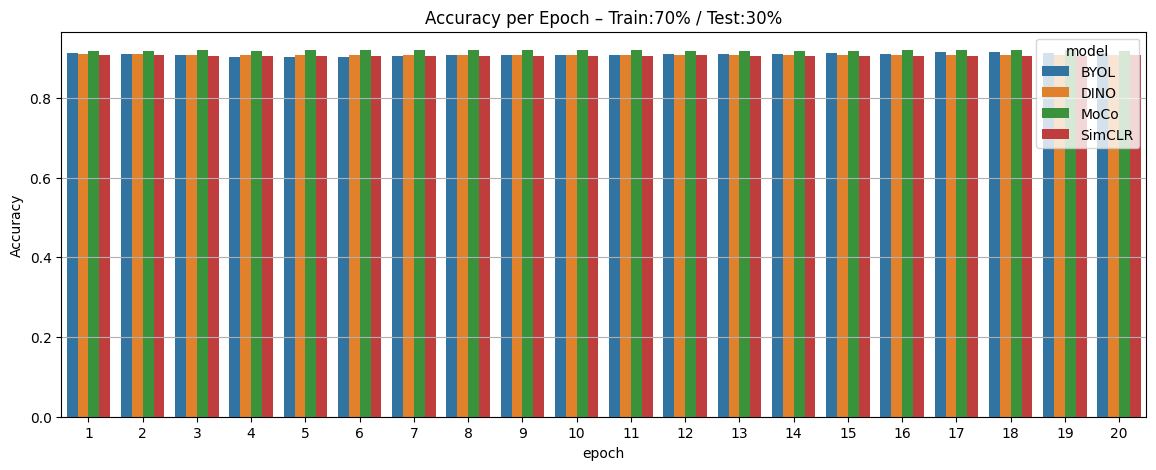

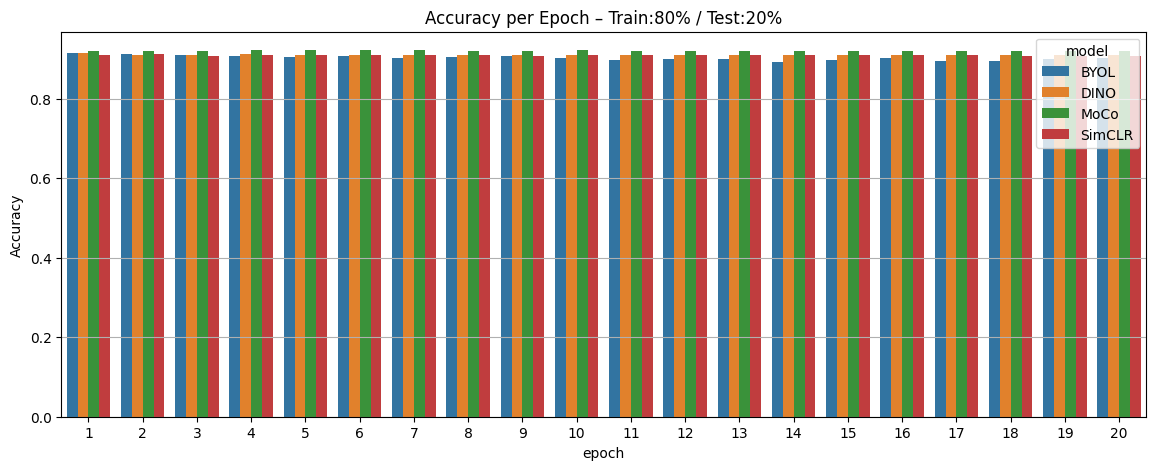

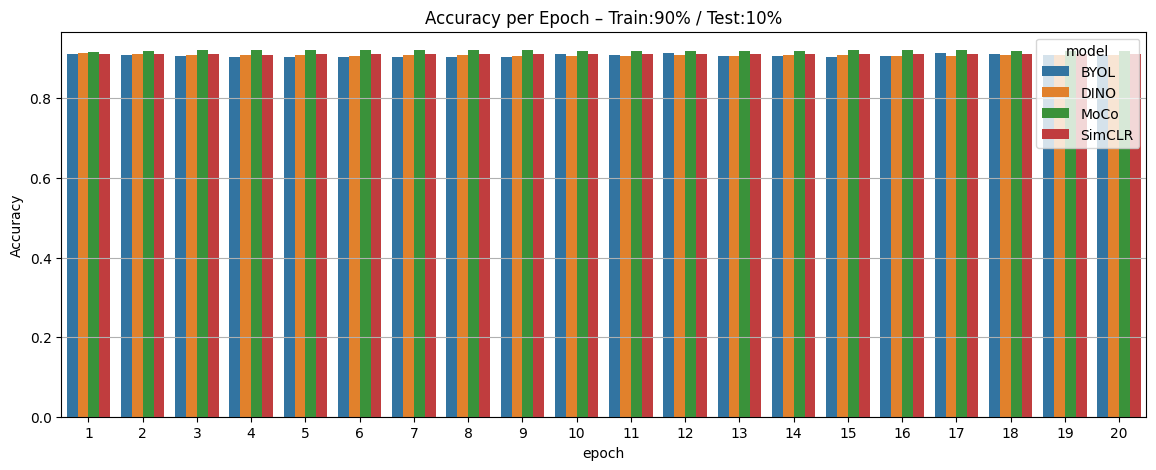

In [12]:
for ratio in all_df[['train_pct', 'test_pct']].drop_duplicates().values:
    train_pct, test_pct = ratio
    subset = all_df[(all_df['train_pct'] == train_pct) & (all_df['test_pct'] == test_pct)]
    
    plt.figure(figsize=(14,5))
    sns.barplot(data=subset, x='epoch', y='accuracy', hue='model')
    plt.title(f"Accuracy per Epoch – Train:{train_pct}% / Test:{test_pct}%")
    plt.ylabel("Accuracy")
    plt.grid(axis='y')
    plt.show()

Compare(14th July)

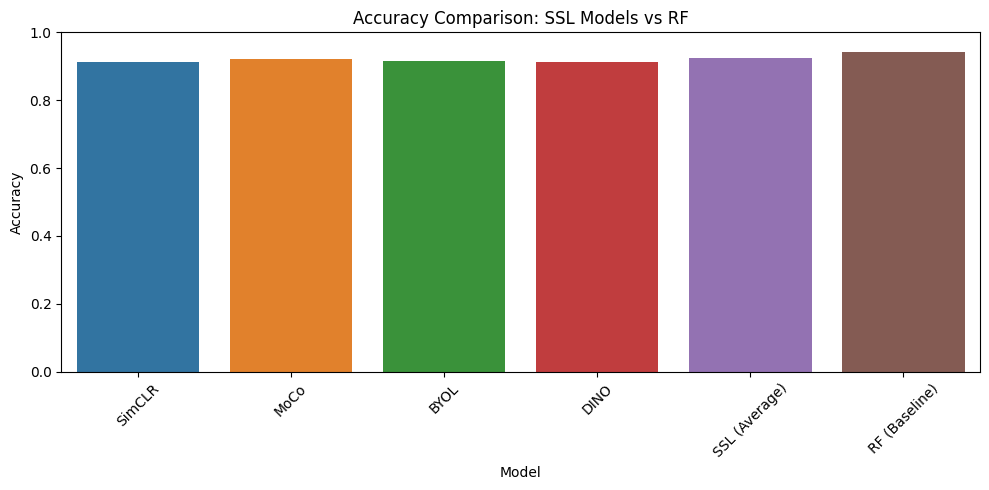

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load all models
byol = pd.read_csv('/kaggle/input/model-data-result/byol_ssl_rf_results_all_epochs.csv')
dino = pd.read_csv('/kaggle/input/model-data-result/dino_ssl_rf_results_all_epochs.csv')
simclr = pd.read_csv('/kaggle/input/model-data-result/simclr_ssl_rf_results_all_epochs.csv')
moco = pd.read_csv('/kaggle/input/model-data-result/moco_results_all_epochs.csv')
ssl = pd.read_csv('/kaggle/input/model-data-result/ssl_rf_results_all_epochs.csv')
rf = pd.read_csv('/kaggle/input/model-data-result/RF_model_results.csv')

# Create DataFrame for max accuracy
comparison_df = pd.DataFrame([
    {"Model": "SimCLR", "Accuracy": simclr['accuracy'].max()},
    {"Model": "MoCo", "Accuracy": moco['accuracy'].max()},
    {"Model": "BYOL", "Accuracy": byol['accuracy'].max()},
    {"Model": "DINO", "Accuracy": dino['accuracy'].max()},
    {"Model": "SSL (Average)", "Accuracy": ssl['accuracy'].max()},
    {"Model": "RF (Baseline)", "Accuracy": rf['accuracy'].max()},
])

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(data=comparison_df, x="Model", y="Accuracy")
plt.title("Accuracy Comparison: SSL Models vs RF")
plt.ylim(0, 1)  # if accuracy is in 0-1 range
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

SSL Display

In [16]:
import pandas as pd

# Load the CSV
ssl = pd.read_csv('/kaggle/input/model-data-result/ssl_rf_results_all_epochs.csv')

# Display the full dataframe
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't wrap columns
pd.set_option('display.colheader_justify', 'left')

In [2]:
ssl.head(20)  # Show first 20 rows


,train_pct,test_pct,accuracy,f1_class_0,f1_class_1
0,10,90,0.905207,0.862762,0.927600
1,20,80,0.908862,0.869143,0.930084
2,30,70,0.912636,0.875277,0.932773
3,40,60,0.916128,0.880935,0.935262
4,50,50,0.919775,0.886746,0.937888
5,60,40,0.919453,0.886205,0.937665
6,70,30,0.921218,0.889107,0.938908
7,80,20,0.922111,0.889967,0.939721
8,90,10,0.923277,0.892197,0.940446


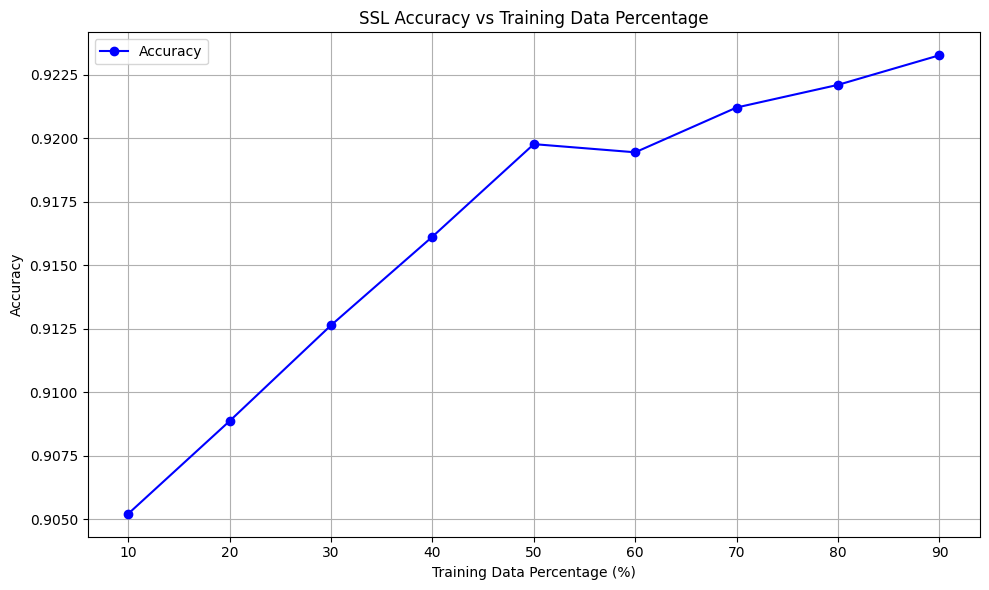

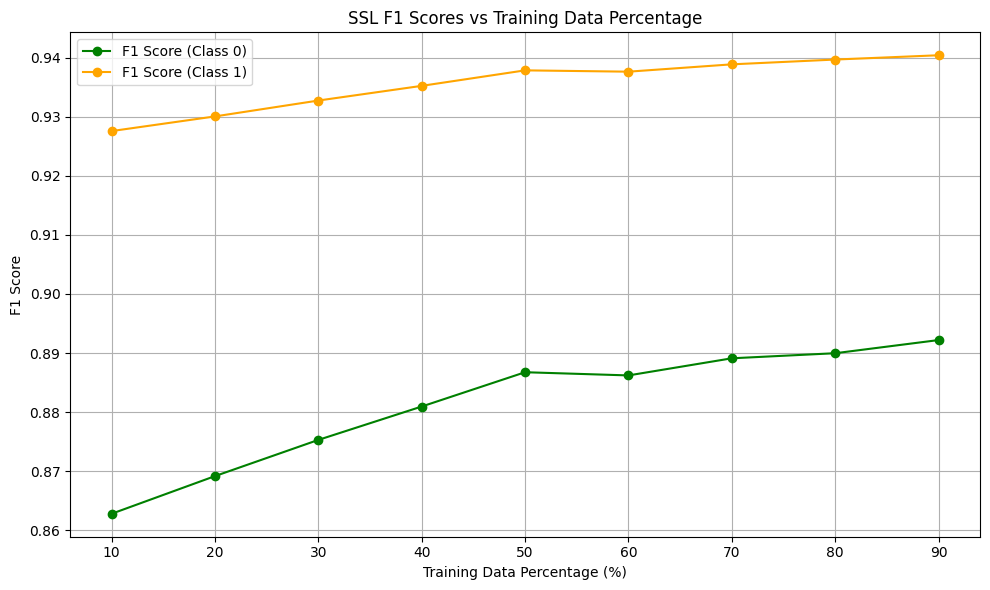

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your SSL results
ssl = pd.read_csv('/kaggle/input/model-data-result/ssl_rf_results_all_epochs.csv')

# Ensure proper column names (replace if needed)
# print(ssl.columns)  # Uncomment to check if column names match below

# Plot Accuracy
plt.figure(figsize=(10,6))
plt.plot(ssl['train_pct'], ssl['accuracy'], marker='o', color='blue', label='Accuracy')
plt.title('SSL Accuracy vs Training Data Percentage')
plt.xlabel('Training Data Percentage (%)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot F1 Scores
plt.figure(figsize=(10,6))
plt.plot(ssl['train_pct'], ssl['f1_class_0'], marker='o', label='F1 Score (Class 0)', color='green')
plt.plot(ssl['train_pct'], ssl['f1_class_1'], marker='o', label='F1 Score (Class 1)', color='orange')
plt.title('SSL F1 Scores vs Training Data Percentage')
plt.xlabel('Training Data Percentage (%)')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


RF Display

In [18]:
import pandas as pd
from IPython.display import display

rf = pd.read_csv('/kaggle/input/model-data-result/RF_model_results.csv')
display(rf)


,Unnamed: 0,model,accuracy,precision_0,recall_0,f1_0,precision_1,recall_1,f1_1
0,10:90,RandomForestClassifier(class_weight='balanced'...,0.927626,0.901464,0.897587,0.899521,0.942302,0.944591,0.943445
1,20:80,RandomForestClassifier(class_weight='balanced'...,0.931614,0.901362,0.910121,0.905720,0.948960,0.943752,0.946349
2,30:70,RandomForestClassifier(class_weight='balanced'...,0.933937,0.903459,0.914700,0.909045,0.951486,0.944800,0.948131
3,40:60,RandomForestClassifier(class_weight='balanced'...,0.935636,0.904633,0.918495,0.911511,0.953568,0.945316,0.949424
4,50:50,RandomForestClassifier(class_weight='balanced'...,0.937580,0.906395,0.922301,0.914279,0.955680,0.946209,0.950921
5,60:40,RandomForestClassifier(class_weight='balanced'...,0.938653,0.906544,0.925430,0.915890,0.957385,0.946121,0.951720
6,70:30,RandomForestClassifier(class_weight='balanced'...,0.939562,0.907824,0.926631,0.917131,0.958074,0.946864,0.952436
7,80:20,RandomForestClassifier(class_weight='balanced'...,0.941535,0.909947,0.930054,0.919890,0.959999,0.948019,0.953971
8,90:10,RandomForestClassifier(class_weight='balanced'...,0.942021,0.909893,0.931613,0.920625,0.960852,0.947899,0.954331


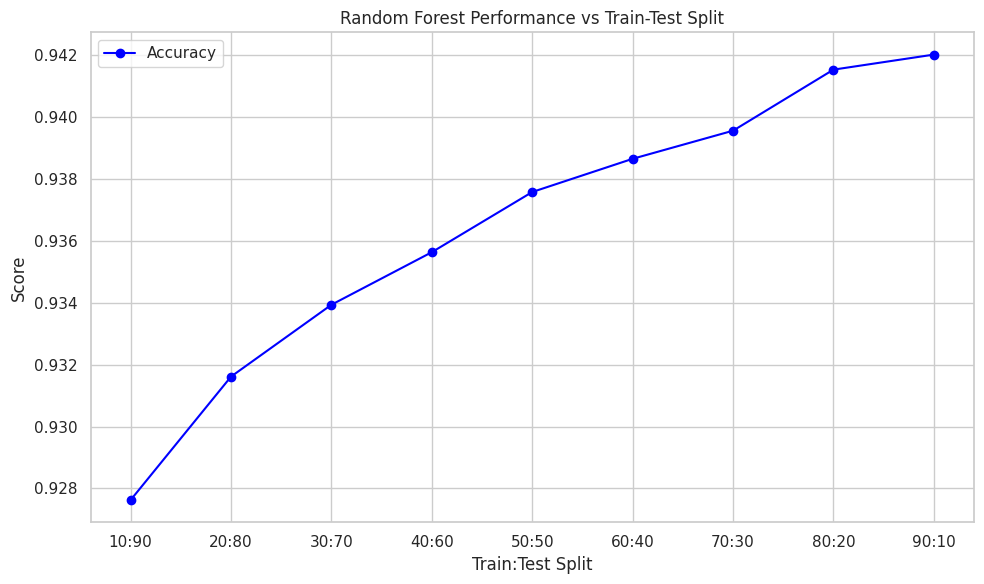

In [21]:
import matplotlib.pyplot as plt

# Plot Accuracy, F1 Score (Normal), and F1 Score (Attack)
plt.figure(figsize=(10, 6))
plt.plot(rf['Unnamed: 0'], rf['accuracy'], marker='o', label='Accuracy', color='blue')


plt.title('Random Forest Performance vs Train-Test Split')
plt.xlabel('Train:Test Split')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


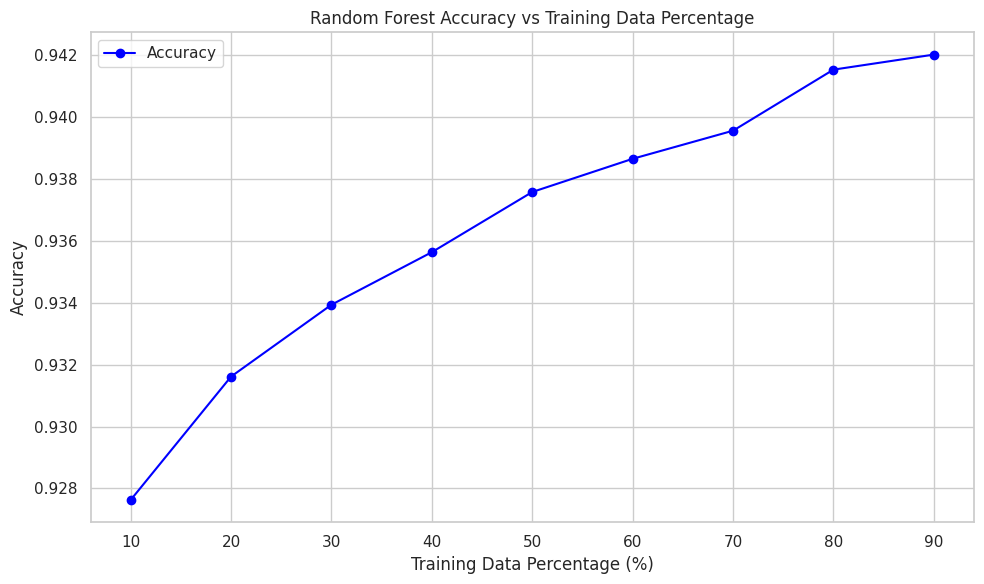

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the RF results
rf = pd.read_csv('/kaggle/input/model-data-result/RF_model_results.csv')

# Extract train percentage from the "Unnamed: 0" column (e.g., '10:90' → 10)
rf['train_pct'] = rf['Unnamed: 0'].str.split(':').str[0].astype(int)

# Plot Accuracy vs Train Percentage
plt.figure(figsize=(10,6))
plt.plot(rf['train_pct'], rf['accuracy'], marker='o', color='blue', label='Accuracy')
plt.title('Random Forest Accuracy vs Training Data Percentage')
plt.xlabel('Training Data Percentage (%)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
byol = pd.read_csv('/kaggle/input/model-data-result/byol_ssl_rf_results_all_epochs.csv')
dino = pd.read_csv('/kaggle/input/model-data-result/dino_ssl_rf_results_all_epochs.csv')
def extract_best(df, model_name):
    best = df.groupby(['train_pct', 'test_pct']).apply(
        lambda g: g.loc[g['accuracy'].idxmax()]
    ).reset_index(drop=True)
    best['model'] = model_name
    return best[['train_pct', 'test_pct', 'accuracy', 'f1_class_0', 'f1_class_1', 'model']]

byol_best = extract_best(byol, 'BYOL')
dino_best = extract_best(dino, 'DINO')
moco_best = extract_best(moco, 'MoCo')

/tmp/ipykernel_35/3584829081.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct']).apply(
/tmp/ipykernel_35/3584829081.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct']).apply(
/tmp/ipykernel_35/3584829081.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and

BYOL Display

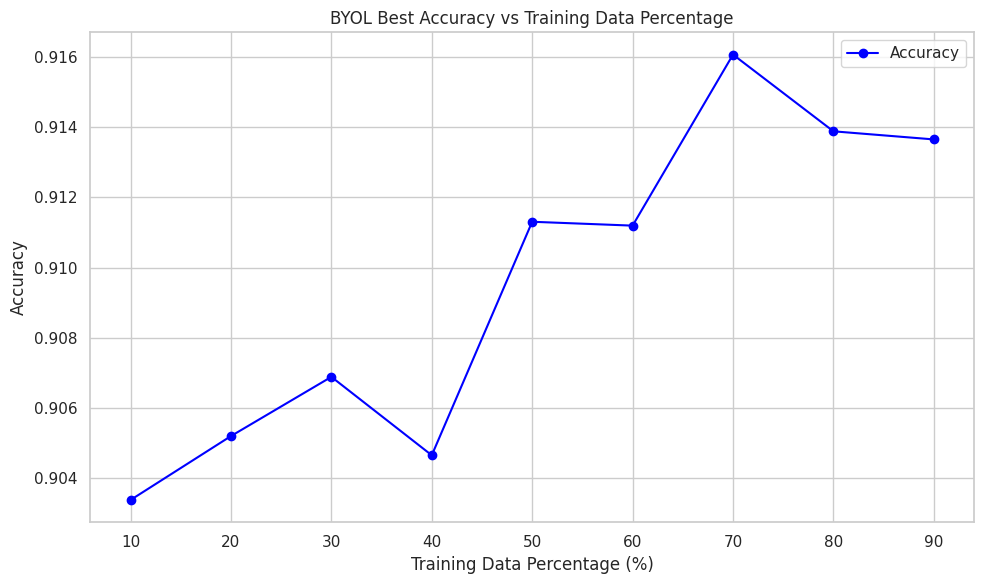

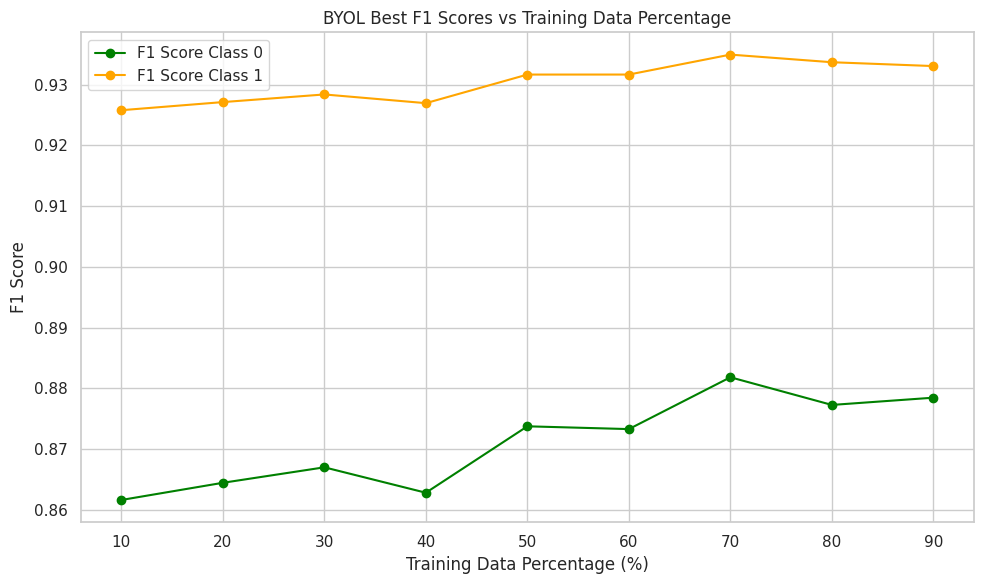

In [23]:
import matplotlib.pyplot as plt

# Plot Accuracy vs Train Percentage for BYOL
plt.figure(figsize=(10,6))
plt.plot(byol_best['train_pct'], byol_best['accuracy'], marker='o', color='blue', label='Accuracy')
plt.title('BYOL Best Accuracy vs Training Data Percentage')
plt.xlabel('Training Data Percentage (%)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot F1 Scores for Class 0 and Class 1
plt.figure(figsize=(10,6))
plt.plot(byol_best['train_pct'], byol_best['f1_class_0'], marker='o', color='green', label='F1 Score Class 0')
plt.plot(byol_best['train_pct'], byol_best['f1_class_1'], marker='o', color='orange', label='F1 Score Class 1')
plt.title('BYOL Best F1 Scores vs Training Data Percentage')
plt.xlabel('Training Data Percentage (%)')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
from IPython.display import display
display(byol_best)


,train_pct,test_pct,accuracy,f1_class_0,f1_class_1,model
0,10.0,90.0,0.903379,0.861625,0.925776,BYOL
1,20.0,80.0,0.905200,0.864454,0.927111,BYOL
2,30.0,70.0,0.906887,0.867001,0.928369,BYOL
3,40.0,60.0,0.904653,0.862817,0.926935,BYOL
4,50.0,50.0,0.911307,0.873750,0.931642,BYOL
5,60.0,40.0,0.911196,0.873292,0.931645,BYOL
6,70.0,30.0,0.916069,0.881821,0.934927,BYOL
7,80.0,20.0,0.913884,0.877268,0.933672,BYOL
8,90.0,10.0,0.913653,0.878462,0.933040,BYOL


Dino Display

In [29]:
from IPython.display import display
display(dino_best)




,train_pct,test_pct,accuracy,f1_class_0,f1_class_1,model
0,10.0,90.0,0.8993,0.8548,0.9229,DINO
1,20.0,80.0,0.9024,0.8595,0.9253,DINO
2,30.0,70.0,0.9044,0.8625,0.9267,DINO
3,40.0,60.0,0.9097,0.8712,0.9304,DINO
4,50.0,50.0,0.9093,0.8704,0.9302,DINO
5,60.0,40.0,0.9087,0.8696,0.9298,DINO
6,70.0,30.0,0.9103,0.8716,0.9311,DINO
7,80.0,20.0,0.9133,0.8771,0.9331,DINO
8,90.0,10.0,0.9129,0.8761,0.9329,DINO


MoCo Display

In [39]:
from IPython.display import display
display(moco_best)

,train_pct,test_pct,accuracy,f1_class_0,f1_class_1,model
0,10,90,0.907389,0.866960,0.928973,MoCo
1,20,80,0.911943,0.874684,0.932124,MoCo
2,30,70,0.914233,0.878089,0.933846,MoCo
3,40,60,0.916994,0.882545,0.935819,MoCo
4,50,50,0.918455,0.884580,0.936958,MoCo
5,60,40,0.919433,0.886015,0.937699,MoCo
6,70,30,0.920028,0.887223,0.938049,MoCo
7,80,20,0.921956,0.889863,0.939566,MoCo
8,90,10,0.921181,0.888596,0.939018,MoCo
